In [ ]:
!pip install yfinance
!pip install matplotlib
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

In [48]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings
import json

## Question 1: Extracting Tesla Stock Data Using yfinance

In [90]:
# We start by creating the Ticker
tesla = yf.Ticker("TSLA")
# As the time period is not sepcified we simply put it at max
tesla_data = tesla.history(period = "max")
# Here we are reseting the index
tesla_data.reset_index(inplace = True)
# Finally we get the first 5 rows
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Extracting Tesla Revenue Data Using Webscraping

In [130]:
# We define the url to which we will make the request
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
# The request
tsla = requests.get(url).text
# We create the BeautifulSoup object
soup = BeautifulSoup(tsla, 'html.parser')
# We create the DataFrame
table = soup.find_all('table')[0]
rows = table.find_all('tr')
data = []

for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    if len(cols) > 1:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# We use the tail function to get the last 5 rows
tesla_revenue.tail(5)

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


## Question 3: Extracting GameStop Stock Data Using yfinance

In [140]:
# First we create the Ticker
gme = yf.Ticker("GME")
# I define the period
gme_data = gme.history(period = "max")
# Reseting the index
gme_data.reset_index(inplace = True)
# Lastly, I show the first five rows with the head function
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Extracting GameStop Revenue Data Using Webscraping

In [142]:
# We define the url to which we will make the request
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
# The request
gme = requests.get(url).text
# We create the BeautifulSoup object
soup = BeautifulSoup(gme, 'html.parser')
# We create the DataFrame
table = soup.find_all('table')[0]
rows = table.find_all('tr')
data = []

for row in rows[1:]:  
    cols = row.find_all('td')
    if len(cols) > 1:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
# We use the tail function to get the last 5 rows
gme_revenue.tail(5)

,Date,Revenue
11,2009,"$8,806"
12,2008,"$7,094"
13,2007,"$5,319"
14,2006,"$3,092"
15,2005,"$1,843"


In [144]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 5: Tesla Stock and Revenue Dashboard

C:\Users\andre\AppData\Local\Temp\ipykernel_7404\2694498819.py:8: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\andre\AppData\Local\Temp\ipykernel_7404\2694498819.py:9: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



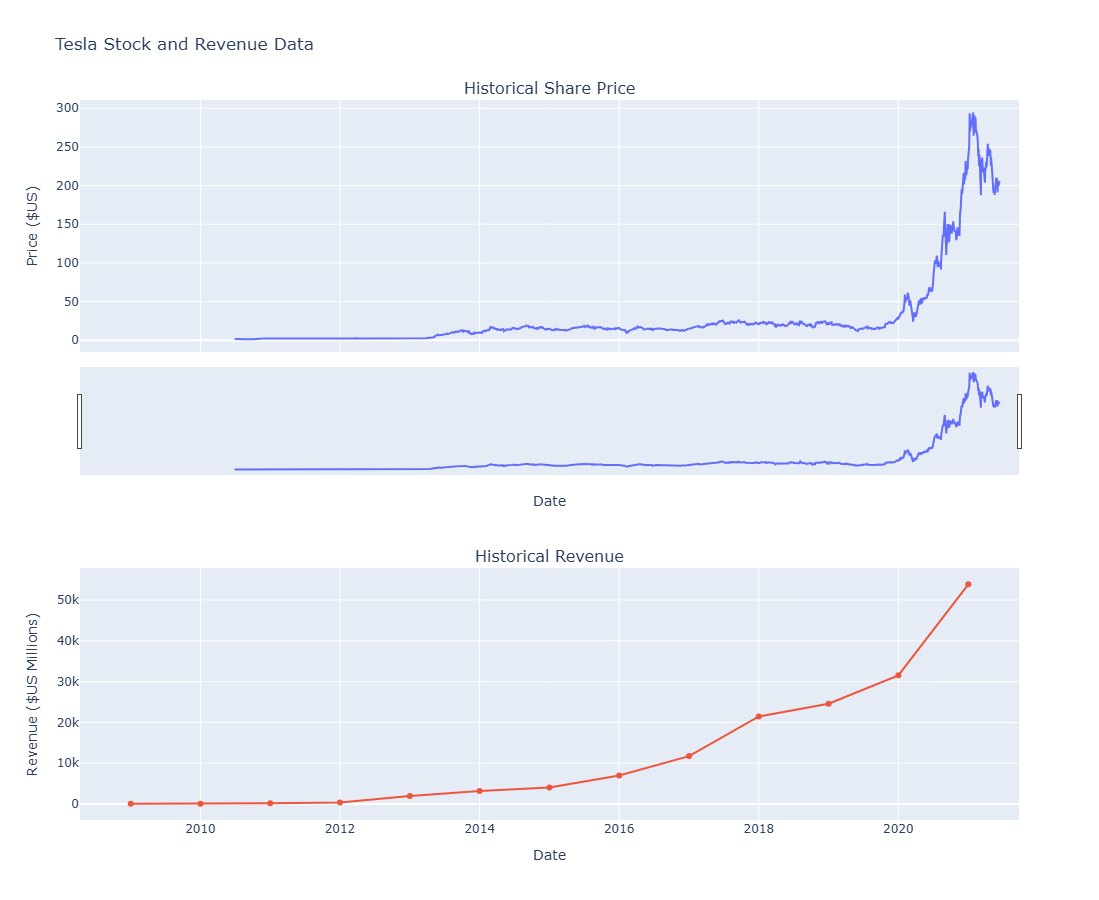

In [136]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str).str.replace(r',|\$', '', regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

make_graph(tesla_data, tesla_revenue, 'Tesla Stock and Revenue Data')

## Question 6: GameStop Stock and Revenue Dashboard

C:\Users\andre\AppData\Local\Temp\ipykernel_7404\2694498819.py:8: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\andre\AppData\Local\Temp\ipykernel_7404\2694498819.py:9: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



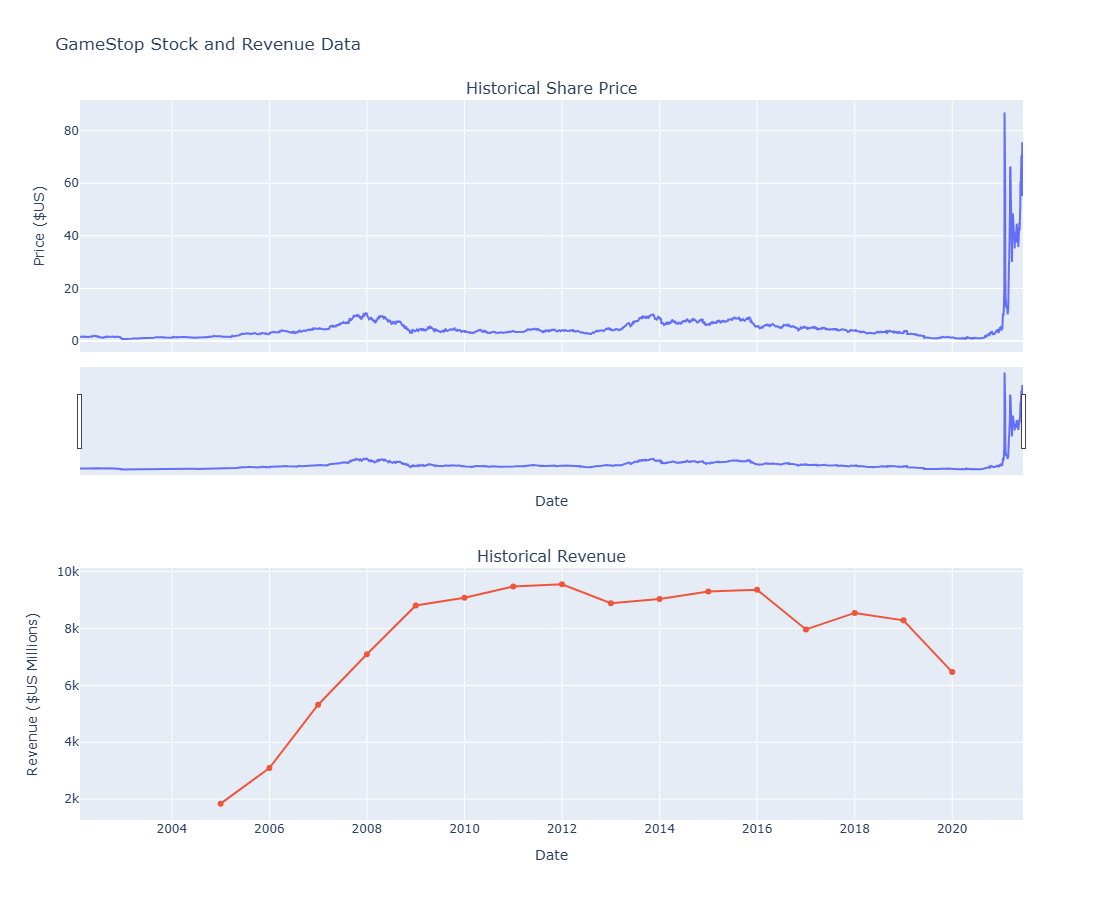

In [152]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(str).str.replace(r',|\$', '', regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

make_graph(gme_data, gme_revenue, 'GameStop Stock and Revenue Data')